In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set_style("darkgrid")

In [3]:
crime_data=pd.read_csv('crime.csv')
crime_data.columns=crime_data.columns.str.lower()

In [4]:
crime_data.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0


In [5]:
crime_data['offense_category_id'].value_counts()

offense_category_id
traffic-accident                106847
all-other-crimes                 74413
theft-from-motor-vehicle         49760
public-disorder                  49619
larceny                          49587
auto-theft                       39854
burglary                         24244
drug-alcohol                     22630
other-crimes-against-persons     21996
aggravated-assault               13652
robbery                           6327
white-collar-crime                6217
sexual-assault                    4031
arson                              720
murder                             381
Name: count, dtype: int64

In [6]:
# Define the offense category mapping
offense_category_id = {
    "larceny": 1,
    "public-disorder": 2,
    "theft-from-motor-vehicle": 3,
    "auto-theft": 4,
    "drug-alcohol": 5,
    "burglary": 6,
    "other-crimes-against-persons": 7,
    "aggravated-assault": 8,
    "white-collar-crime": 9,
    "sexual-assault": 10,
    "robbery": 11,
    "arson": 12,
    "murder": 13,
    "traffic-accident": 14,
    "all-other-crimes": 15
}

In [7]:
# Replace offense categories with mapped integers
crime_data["crime_id"] = crime_data["offense_category_id"].replace(offense_category_id)

In [8]:
# Check the data type of the 'crime_id' column
print(crime_data["crime_id"].dtype)  # Output should be 'int64'

int64


In [9]:
crime_data['crime_id'].value_counts()

crime_id
14    106847
15     74413
3      49760
2      49619
1      49587
4      39854
6      24244
5      22630
7      21996
8      13652
11      6327
9       6217
10      4031
12       720
13       381
Name: count, dtype: int64

In [10]:
crime_data.isnull().sum()

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      295750
reported_date                  0
incident_address           37865
geo_x                       4031
geo_y                       4031
geo_lon                     4032
geo_lat                     4032
district_id                    1
precinct_id                    1
neighborhood_id                1
is_crime                       0
is_traffic                     0
crime_id                       0
dtype: int64

In [11]:
crime_data.drop(['offense_id','geo_x','geo_y','last_occurrence_date','incident_address'],axis=1,inplace=True)

In [12]:
crime_data.dropna(inplace=True)

In [13]:
crime_data.isnull().sum()

incident_id               0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
reported_date             0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
crime_id                  0
dtype: int64

In [34]:
crime_data['first_occurrence_date'] = pd.to_datetime(crime_data['first_occurrence_date'])

#Extract year, month ,day and hour from 'first_occurrence_date'
crime_data['year'] = crime_data['first_occurrence_date'].dt.year
crime_data['month'] = crime_data['first_occurrence_date'].dt.month
crime_data['day'] = crime_data['first_occurrence_date'].dt.day
crime_data['hour'] = crime_data['first_occurrence_date'].dt.hour

<Axes: title={'center': 'offense_category_id'}, ylabel='offense_category_id'>

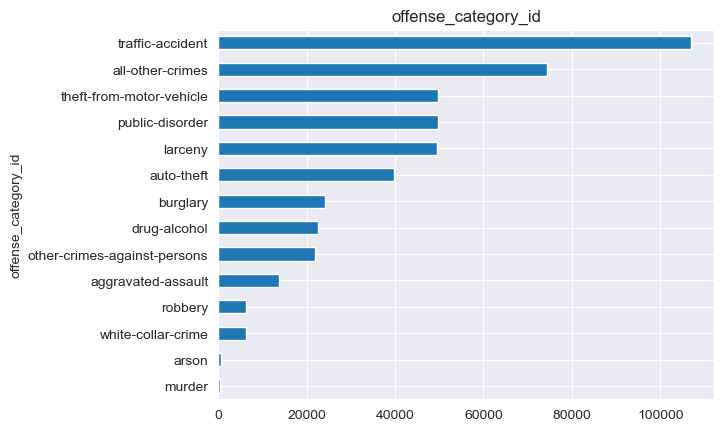

In [19]:
crime_data[crime_data.duplicated(keep=False)]

# Get value counts of 'offense_category_id' for duplicated rows and select top 15
crime_data['offense_category_id'].value_counts() [:15].sort_values (ascending=True).plot(kind='barh',title='offense_category_id')

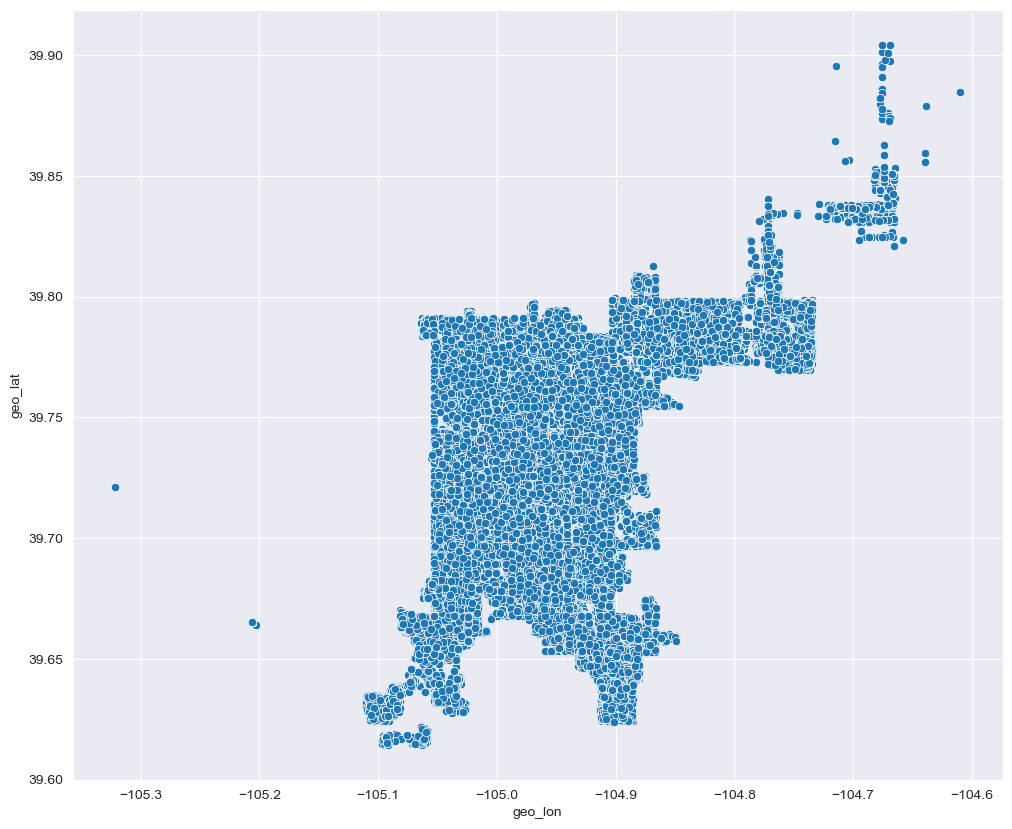

In [28]:
crime_data_filtered = crime_data[(crime_data['geo_lon'] < -50) & (crime_data['geo_lat'] > 38)]

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='geo_lon',y='geo_lat', data=crime_data_filtered)
plt.show()

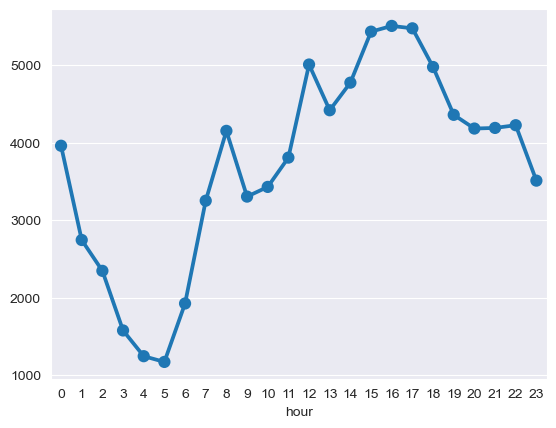

In [38]:
crime_data_2019 = crime_data[crime_data['year'] == 2019]

hourly_counts = crime_data_2019['hour'].value_counts().sort_index()

# Create a point plot
zone_plot = sns.pointplot(x=hourly_counts.index, y=hourly_counts.values)

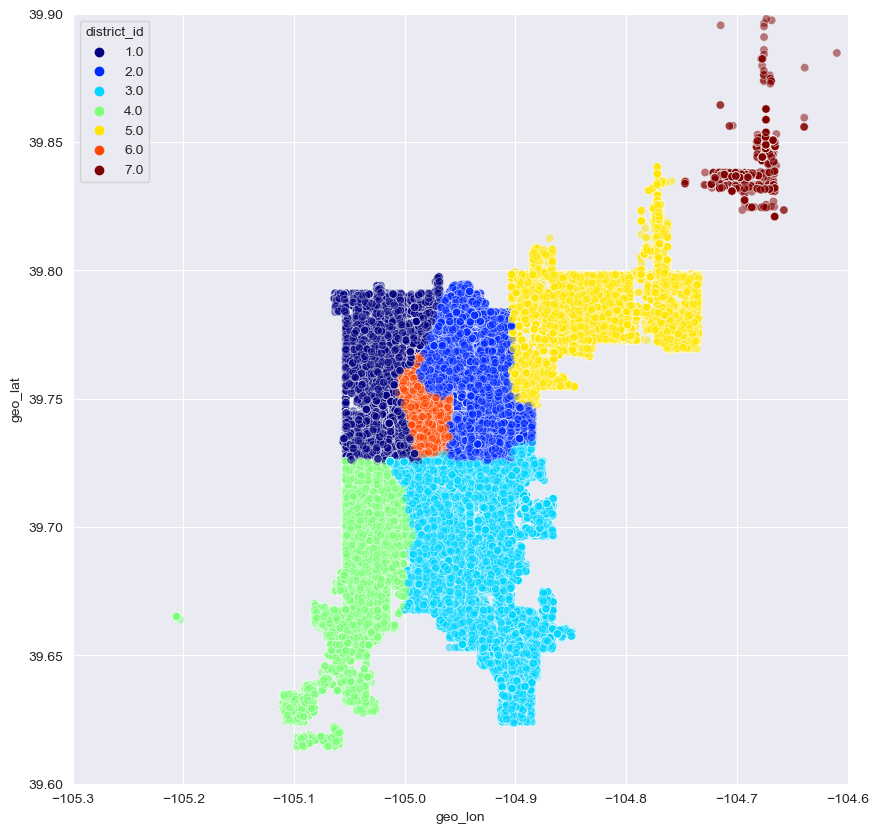

In [39]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create the scatter plot with adjusted transparency and colored by district_id
sns.scatterplot(x='geo_lon', y='geo_lat', alpha=0.5, hue='district_id', palette=plt.get_cmap('jet'), legend='full', data=crime_data)

# Set x-axis and y-axis limits
plt.xlim(-105.3, -104.6)  # Set the limit for the x-axis
plt.ylim(39.60, 39.90)    # Set the limit for the y-axis

# Show the plot
plt.show()

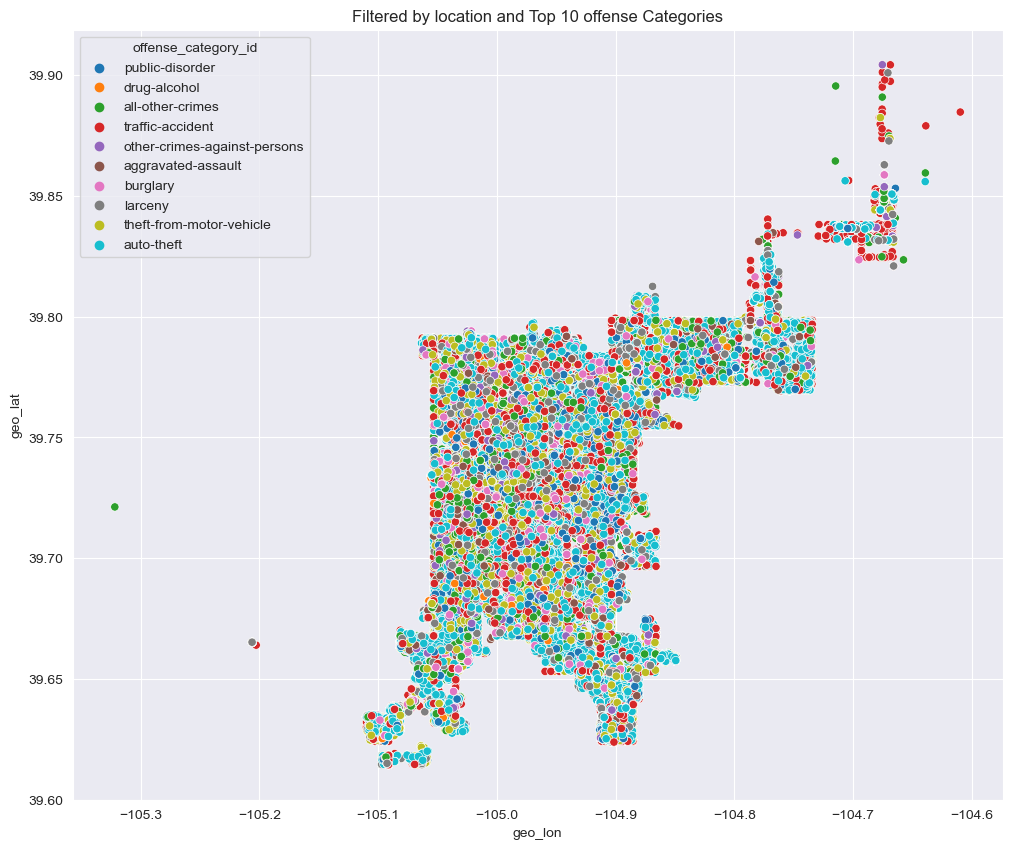

In [41]:
offense_cats = crime_data['offense_category_id'].value_counts().head(10).index

plt.figure(figsize=(12,10))
sns.scatterplot(x='geo_lon',y='geo_lat',hue='offense_category_id',data=crime_data_filtered[crime_data_filtered['offense_category_id'].isin(offense_cats)])
plt.title('Filtered by location and Top 10 offense Categories')

plt.show()

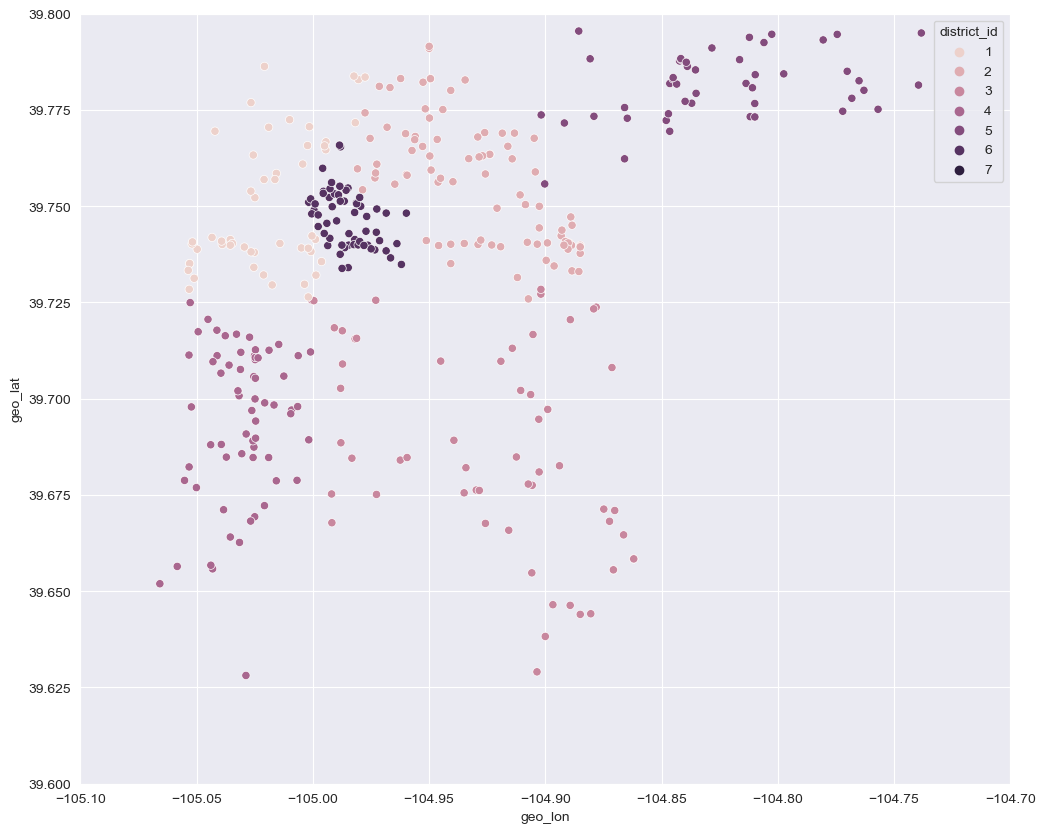

In [42]:
murder_data = crime_data[crime_data['offense_category_id']=='murder']

# Create the scatter plot
plt.figure(figsize=(12,10))
sns.scatterplot(x='geo_lon', y='geo_lat', hue='district_id', data=murder_data)
plt.xlim(-105.1, -104.7)  # Set the limit for the x-axis
plt.ylim(39.60, 39.80)    # Set the limit for the y-axis
plt.show()

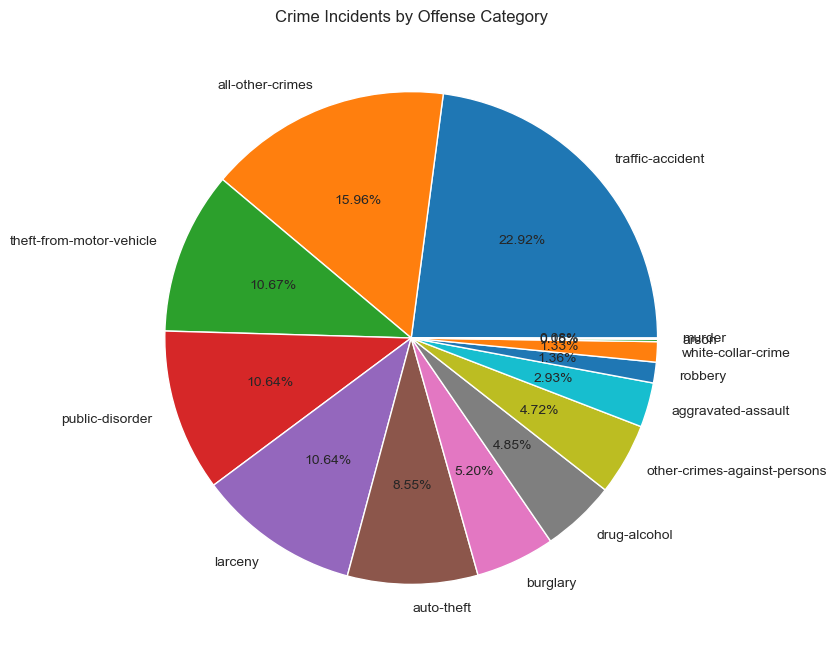

In [55]:
# Get value counts of offense categories
offense_counts = crime_data['offense_category_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(offense_counts,labels=offense_counts.index, autopct='%1.2f%%')
plt.title('Crime Incidents by Offense Category')
plt.show()

In [59]:
def to_numeric_ignore_errors(column):
    return pd.to_numeric(column, errors='coerce')

#Apply the function to each column
crime_data_numeric = crime_data.apply(to_numeric_ignore_errors)

#Now calculate correlation
correlation_matrix = crime_data_numeric.corr()
print(correlation_matrix)


                        incident_id  offense_code  offense_code_extension  \
incident_id                1.000000     -0.107714                0.022605   
offense_code              -0.107714      1.000000               -0.079369   
offense_code_extension     0.022605     -0.079369                1.000000   
offense_type_id                 NaN           NaN                     NaN   
offense_category_id             NaN           NaN                     NaN   
first_occurrence_date      0.051056     -0.145074                0.010816   
reported_date                   NaN           NaN                     NaN   
geo_lon                   -0.000281      0.010804               -0.002744   
geo_lat                    0.004150     -0.009280                0.003662   
district_id                0.033194     -0.031965                0.017967   
precinct_id                0.036106     -0.032096                0.018528   
neighborhood_id                 NaN           NaN                     NaN   

In [60]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466246 entries, 0 to 470277
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             466246 non-null  int64         
 1   offense_code            466246 non-null  int64         
 2   offense_code_extension  466246 non-null  int64         
 3   offense_type_id         466246 non-null  object        
 4   offense_category_id     466246 non-null  object        
 5   first_occurrence_date   466246 non-null  datetime64[ns]
 6   reported_date           466246 non-null  object        
 7   geo_lon                 466246 non-null  float64       
 8   geo_lat                 466246 non-null  float64       
 9   district_id             466246 non-null  float64       
 10  precinct_id             466246 non-null  float64       
 11  neighborhood_id         466246 non-null  object        
 12  is_crime                466246 non-

In [65]:
# List of columns to drop
columns_to_drop = [
    'offense_type_id',
    'offense_category_id',
    'first_occurrence_date',
    'reported_date',
    'neighborhood_id',
    'is_crime'
]

# Drop the columns not present in the list
df = crime_data.drop(columns=columns_to_drop)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466246 entries, 0 to 470277
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             466246 non-null  int64  
 1   offense_code            466246 non-null  int64  
 2   offense_code_extension  466246 non-null  int64  
 3   geo_lon                 466246 non-null  float64
 4   geo_lat                 466246 non-null  float64
 5   district_id             466246 non-null  float64
 6   precinct_id             466246 non-null  float64
 7   is_traffic              466246 non-null  int64  
 8   crime_id                466246 non-null  int64  
 9   year                    466246 non-null  int32  
 10  month                   466246 non-null  int32  
 11  day                     466246 non-null  int32  
 12  hour                    466246 non-null  int32  
dtypes: float64(4), int32(4), int64(5)
memory usage: 42.7 MB


<Axes: >

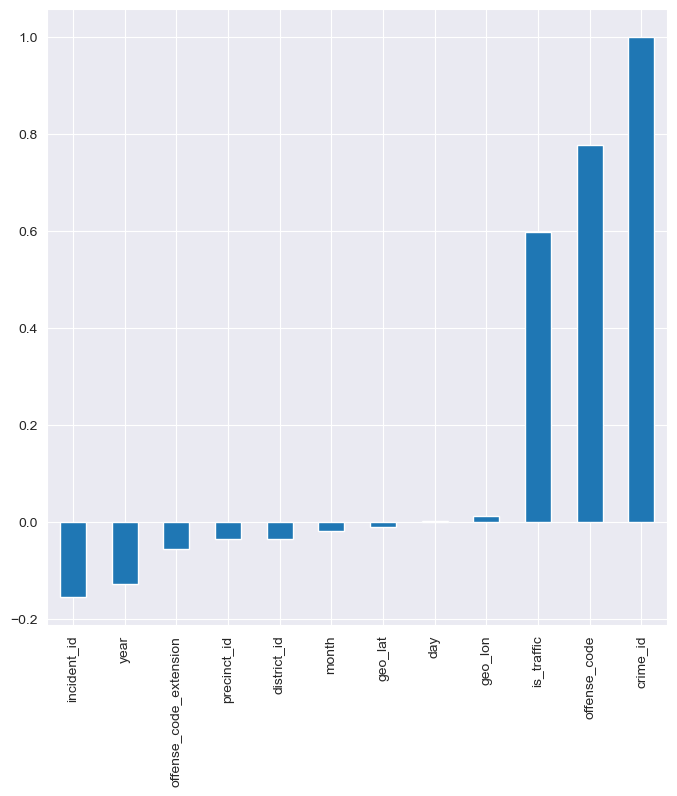

In [68]:
plt.figure(figsize=(8,8))
df.corr()["crime_id"][:-1].sort_values().plot(kind='bar')

In [69]:
df

,incident_id,offense_code,offense_code_extension,geo_lon,geo_lat,district_id,precinct_id,is_traffic,crime_id,year,month,day,hour
0,20226000193,2999,0,-105.018825,39.714268,4.0,411.0,0,2,2022,1,4,11
1,20223319,2999,0,-104.993418,39.743649,6.0,611.0,0,2,2022,1,3,6
2,20223093,2999,0,-104.975557,39.740130,6.0,621.0,0,2,2022,1,3,1
3,20224000,2999,0,-105.014892,39.711518,4.0,411.0,0,2,2022,1,3,19
4,20223956,2999,0,-104.897950,39.769688,5.0,512.0,0,2,2022,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470273,202297778,2607,0,-105.084098,39.629311,4.0,423.0,0,9,2022,2,25,8
470274,202297851,2607,0,-104.823123,39.797813,5.0,521.0,0,9,2022,1,27,9
470275,202296894,2609,0,-104.920013,39.721561,3.0,321.0,0,9,2022,2,24,12
470276,2022100071,2699,3,-105.025716,39.742973,1.0,121.0,0,1,2022,2,27,12


In [70]:
df['crime_id'].value_counts()

crime_id
14    106846
15     74413
3      49760
2      49619
1      49587
4      39854
6      24244
5      22630
7      21996
8      13652
11      6327
9       6217
12       720
13       381
Name: count, dtype: int64

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['crime_id'], axis=1), df['crime_id'], test_size=0.33, random_state=42)

# Random Forest
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
rfc.fit(x_train, y_train)

# Predictions
y_pred = rfc.predict(x_test)

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[16121     0    29     2     0     0     0     0     0     0     0     0
      0     0]
 [    7 16295     1     0    28     7     1    27     0     0     1     0
      0    65]
 [   53     0 16367     0     0     0     0     0     0     0     0     0
      0     0]
 [   14     0     0 13361     0     0     0     0     2     0     0     0
      0     0]
 [    5    55     0     0  7435     0     3     0     0     0     0     0
      0     2]
 [    5     7     1     1     0  8060     0     0     0     0     1     0
      0     0]
 [    1    19     6     0   152     4  6921     2     0     2     1     0
      0     4]
 [    4    18     1     0     0     4    21  4386     0     0     0     1
      0     0]
 [   13     2     0    49     2     0     0     0  1992     0     0     0
      0     0]
 [    0     3     3     0     0     0    64     6     0  2048     1     0
      0     5]
 [    2    35     5     0     0    31     1     5     0     0   146     0
      0     3]
 [    0     0     0  

In [81]:
print("Accuracy =",metrics.accuracy_score(y_test,y_pred)*100)
print("Error =",(1-metrics.accuracy_score(y_test,y_pred))*100)

Accuracy = 99.17653481691386
Error = 0.8234651830861472


In [83]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision*100)

Precision: 99.17527488093472


In [84]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall*100)

Recall: 99.17653481691386


In [85]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1*100)

F1 Score: 99.15701036855049


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Example for KNN
param_grid_knn = {
    'n_neighbors':[3,5,7,9],
    'metric':['euclidean','manhattan'],
    'algorithm':['auto','ball_tree','kd_tree']
    
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3}


In [89]:
from sklearn.metrics import accuracy_score
best_params_knn = grid_search_knn.best_params_

# Initialize KNN classifier with best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],
                                metric=best_params_knn['metric'],
                                algorithm=best_params_knn['algorithm'])

# Fit the model with training data
knn_best.fit(x_train, y_train)

# Predict using the trained model
y_pred_knn_best = knn_best.predict(x_test)

# Calculate accuracy
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print("Accuracy of KNN with best parameters:", accuracy_knn_best)

Accuracy of KNN with best parameters: 0.6654664569549337


In [90]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini',splitter='random',min_samples_split=15)

# Fit the model with training data
dt_classifier.fit(x_train, y_train)

# Predict using the trained model
y_pred_dt = dt_classifier.predict(x_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree classifier:", accuracy_dt)

Accuracy of Decision Tree classifier: 0.9999025100414657
